In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow

from tensorflow import nn as nn
import numpy as np
import helper

from get_data import read_data_sets

In [13]:
data = read_data_sets('./data', one_hot=True)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [14]:
print("training data:", len(data.train.images))
print("testing data:", len(data.test.images))

('training data:', 55000)
('testing data:', 10000)


In [15]:
convFilter = 5
layer1 = 16
layer2 = 36
neuron = 128 
x = tensorflow.placeholder(tensorflow.float32, shape=[None, 784], name='x')
x_image = tensorflow.reshape(x, [-1, 28, 28, 1])
y = tensorflow.placeholder(tensorflow.float32, shape=[None, 10], name='y')
y_true = tensorflow.argmax(y, axis=1)

In [16]:
# conv layers
convLayer1 = helper.convolution_layer(x_image, 1, convFilter, layer1)
convLayer2 = helper.convolution_layer(convLayer1, layer1, convFilter, layer2)

In [17]:
# flatten layer
flat, nFeatures = helper.flatten(convLayer2)

In [18]:
# fully connected and output layers

fullyConnected = helper.fully_connected(flat, nFeatures, neuron)

outputLayer = helper.fully_connected(fullyConnected, neuron, 10)

In [19]:
prediction = tensorflow.nn.softmax(outputLayer)
prediction = tensorflow.argmax(prediction, axis=1)
cross_entropy = nn.softmax_cross_entropy_with_logits(logits=outputLayer,labels=y)

mean = tensorflow.reduce_mean(cross_entropy)

adamOptimizer = helper.choose_optimizer("Adam", mean)
rmsOptimizer = helper.choose_optimizer("RMS", mean)

session = tensorflow.Session()
session.run(tensorflow.global_variables_initializer())

correct = tensorflow.equal(prediction, y_true)
accuracy = tensorflow.reduce_mean(tensorflow.cast(correct, tensorflow.float32))

In [20]:
helper.run_optimizer(1000, data, adamOptimizer, session, x, y) 
# This will take a couple mins
# After some tests, Adam seems like a better optimizer

('Accuracy: ', 0.8646)


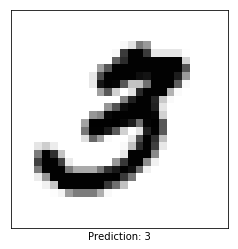

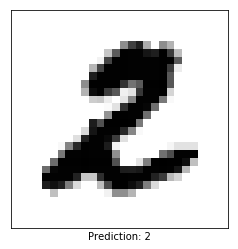

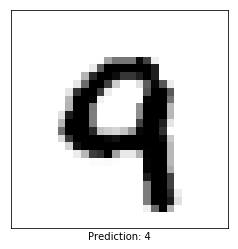

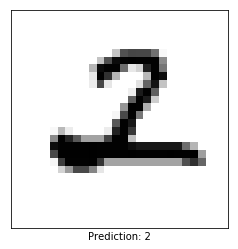

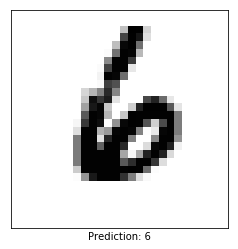

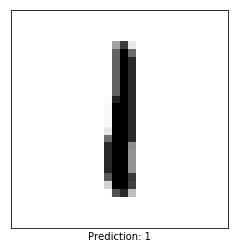

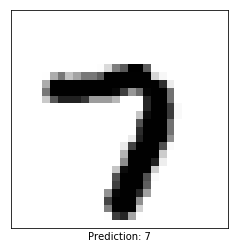

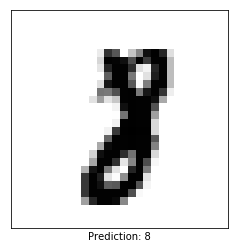

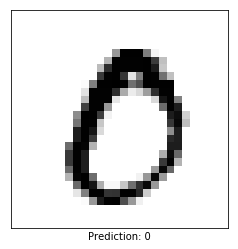

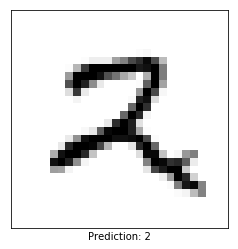

In [21]:
pred, acc = helper.get_accuracy(data, session, x, y, prediction)

print("Accuracy: ", acc)

# Choose 10 random images, and output the prediction
import random
for x in range(10):
    i = random.randint(0, 9999) # 10000 images in test set
    image = data.test.images[i]
    prediction = pred[i]
    helper.plot(image, prediction) 